In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pyrootutils

base_path = pyrootutils.setup_root(
    search_from=".",
    indicator=[".gitignore"],
    project_root_env_var=True,  # set the PROJECT_ROOT environment variable to root directory
    dotenv=True,  # load environment variables from .env if exists in root directory
    pythonpath=True,  # add root directory to the PYTHONPATH (helps with imports)
    cwd=True,  # change current working directory to the root directory (helps with filepaths)
)
import pandas as pd
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib
import matplotlib as mpl
from itertools import combinations
from tqdm import tqdm
import h5py

from src.data.utils import *
from src.data.datamodules import SpatialDataModule
from src.data.graph_utils import *
from src.utils.data_paths import *

In [5]:
# load h5 file
path = "./data/spatial/anca_visium/test_sample"
adata = sc.read_visium(path)

/root/miniconda3/envs/dissect-spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [9]:
coords = adata.obsm["spatial"]
norm_coords = normalize_coords(coords)
dist_mat = distance_matrix(norm_coords, norm_coords)

Graph args: {'radius': 0.0275}
Number of nodes: 480
Number of edges: 1728
Average degree: 7.2


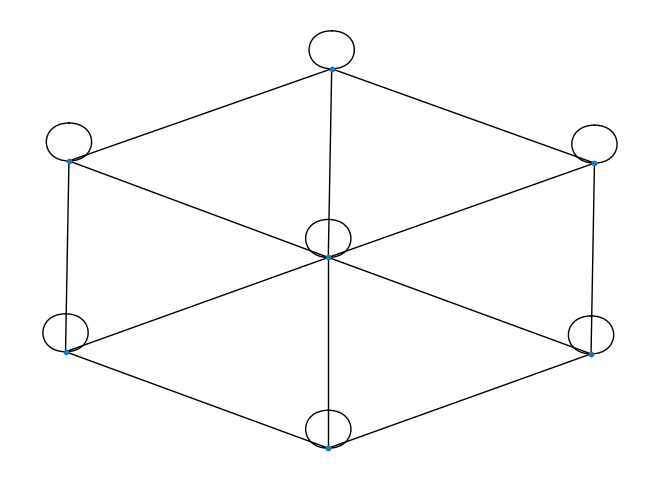

(7.2, <networkx.classes.graph.Graph at 0x7f6be58681f0>)

In [29]:
check_graph_construction(coords, num_hops=1, radius=0.0275)

Graph args: {'num_layers': 1}
Number of nodes: 480
Number of edges: 787
Average degree: 3.279166666666667


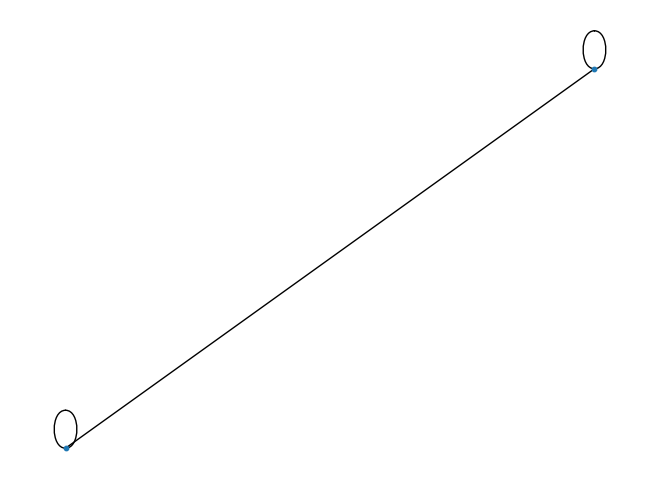

(3.279166666666667, <networkx.classes.graph.Graph at 0x7f6c1499b310>)

In [22]:
check_graph_construction(coords, num_hops=1, num_layers=1)

In [16]:
adata = sc.read_h5ad("../data/single-cell/kidney/Mature_Full_v3_harmonizedCelltypes.h5ad")

In [21]:
adata.obs

,Barcode,Short_Sample,Project,Experiment,celltype,compartment,broad_celltype,cell_type
CZIKidney7632804_GCATGTATCCGAAGAG-1,GCATGTATCCGAAGAG-1,CZIKidney7632804,Experiment set 2,TxK4,Thick ascending limb of Loop of Henle,non_PT,Thick ascending limb of Loop of Henle,kidney loop of Henle thick ascending limb epit...
4602STDY6930853_GGCTCGACATCCGTGG-1,GGCTCGACATCCGTGG-1,4602STDY6930853,Experiment set 1,RCC1,Peritubular capillary endothelium 2,non_PT,Peritubular capillary endothelium,endothelial cell
4602STDY6976428_GGAATAAAGCTGAACG-1,GGAATAAAGCTGAACG-1,4602STDY6976428,Experiment set 1,RCC2,Proximal tubule,PT,Proximal tubule,kidney proximal convoluted tubule epithelial cell
4602STDY6976426_CCACGGATCTGGCGTG-1,CCACGGATCTGGCGTG-1,4602STDY6976426,Experiment set 1,RCC2,NK cell,lymphoid,NK cell,leukocyte
4602STDY7018628_GCGGGTTTCTTCATGT-1,GCGGGTTTCTTCATGT-1,4602STDY7018628,Experiment set 1,RCC3,Proximal tubule,PT,Proximal tubule,kidney proximal convoluted tubule epithelial cell
...,...,...,...,...,...,...,...,...
4602STDY6930852_AGACGTTCAATTGCTG-1,AGACGTTCAATTGCTG-1,4602STDY6930852,Experiment set 1,RCC1,Proximal tubule,PT,Proximal tubule,kidney proximal convoluted tubule epithelial cell
4602STDY6976428_GATCAGTTCTGCCCTA-1,GATCAGTTCTGCCCTA-1,4602STDY6976428,Experiment set 1,RCC2,Ascending vasa recta endothelium,non_PT,Ascending vasa recta endothelium,endothelial cell
4602STDY6949181_GTGCGGTGTAAAGGAG-1,GTGCGGTGTAAAGGAG-1,4602STDY6949181,Experiment set 1,VHL_RCC,CD4 T cell,lymphoid,CD4 T cell,leukocyte
4602STDY6949188_CCCAGTTCAGGATCGA-1,CCCAGTTCAGGATCGA-1,4602STDY6949188,Experiment set 1,Teen Tx,Indistinct intercalated cell,non_PT,Intercalated cell,kidney collecting duct intercalated cell


In [23]:
adata.obs["broad_celltype"].unique()

['Thick ascending limb of Loop of Henle', 'Peritubular capillary endothelium', 'Proximal tubule', 'NK cell', 'CD4 T cell', ..., 'Fibroblast', 'MNP-b/non-classical monocyte derived', 'Principal cell', 'Plasmacytoid dendritic cell', 'Mast cell']
Length: 26
Categories (26, object): ['Ascending vasa recta endothelium', 'B cell', 'CD4 T cell', 'CD8 T cell', ..., 'Principal cell', 'Proximal tubule', 'Thick ascending limb of Loop of Henle', 'Transitional urothelium']

In [25]:
adata.obs["cell_type"].unique()

['kidney loop of Henle thick ascending limb epi..., 'endothelial cell', 'kidney proximal convoluted tubule epithelial ..., 'leukocyte', 'podocyte', ..., 'kidney collecting duct intercalated cell', 'macrophage', 'kidney distal convoluted tubule epithelial cell', 'kidney interstitial fibroblast', 'kidney collecting duct principal cell']
Length: 11
Categories (11, object): ['Unknown', 'endothelial cell', 'kidney collecting duct intercalated cell', 'kidney collecting duct principal cell', ..., 'kidney proximal convoluted tubule epithelial ..., 'leukocyte', 'macrophage', 'podocyte']

In [15]:
adata.write_h5ad("../data/spatial/anca_visium/test_sample.h5ad")

In [9]:
adata.shape

(480, 17943)

[<AxesSubplot: title={'center': 'CD4'}, xlabel='spatial1', ylabel='spatial2'>]

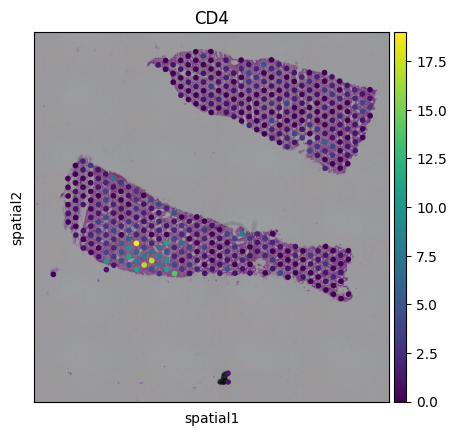

In [10]:
sc.pl.spatial(adata, color="CD4", size=1, show=False)

In [3]:
st_data_files = [
    "spatial/simulations_kidney_slideSeq_v2/UMOD-WT.WT-2a_resolution75.h5ad",
    "spatial/simulations_kidney_slideSeq_v2/UMOD-KI.KI-4b_resolution105.h5ad",
    "spatial/simulations_heart_seqFISH/embryo1_resolution0.11.h5ad",
    "spatial/V1_Mouse_Brain_Sagittal_Anterior.h5ad",
    "spatial/lymph_node/st_lymph.h5ad",
]
experiment_dirs = [
    "experiments/experiment_kidney_slideSeq_v2_UMOD-WT.WT-2a_resolution75",
    "experiments/experiment_kidney_slideSeq_v2_105",
    "experiments/experiment_heart_seqFISH_embryo1_resolution0.11-new",
    "experiments/experiment_mouse_st",
    "experiments/experiment_lymph_node",
]
sc_paths = [
    "./data/spatial/kidney_slideSeq_v2/UMOD-WT.WT-2a.h5ad",
    "./data/spatial/kidney_slideSeq_v2_105.h5ad",
    "./data/spatial/heart_seqFISH/embryo1.h5ad",
    "./data/single-cell/Allenbrain_forSimulation_uniquect.h5ad",
    "./data/single-cell/lymph_node/sc_lymph.h5ad", 
]
sc_data_files = [
    "spatial/kidney_slideSeq_v2/UMOD-WT.WT-2a.h5ad",
    "spatial/kidney_slideSeq_v2_105.h5ad",
    "spatial/heart_seqFISH/embryo1.h5ad",
    "single-cell/Allenbrain_forSimulation_uniquect.h5ad",
    "single-cell/lymph_node/sc_lymph.h5ad",
]
sc_paths = ["../data/" + f for f in sc_data_files]
st_paths = ["../data/" + f for f in st_data_files]
experiment_paths = ["../" + dir for dir in experiment_dirs]

In [4]:
st_paths = [
    "./data/spatial/simulations_kidney_slideSeq_v2/UMOD-KI.KI-4b_resolution105.h5ad",
    "./data/spatial/simulations_kidney_slideSeq_v2/UMOD-WT.WT-2a_resolution75.h5ad",
    "./data/spatial/simulations_heart_seqFISH/embryo1_resolution0.11.h5ad",
    "./data/spatial/simulations_heart_seqFISH/embryo2_resolution0.11.h5ad",
    "./data/spatial/simulations_heart_seqFISH/embryo3_resolution0.11.h5ad",
    "./data/spatial/lymph_node/st_lymph.h5ad",
    "./data/spatial/V1_Mouse_Brain_Sagittal_Anterior.h5ad",
]
sc_paths = [
    "./data/spatial/kidney_slideSeq_v2/UMOD-KI.KI-4b.h5ad",
    "./data/spatial/kidney_slideSeq_v2/UMOD-WT.WT-2a.h5ad",
    "./data/spatial/heart_seqFISH/embryo1.h5ad",
    "./data/spatial/heart_seqFISH/embryo2.h5ad",
    "./data/spatial/heart_seqFISH/embryo3.h5ad",
    "./data/single-cell/lymph_node/sc_lymph.h5ad",
    "./data/single-cell/Allenbrain_forSimulation_uniquect.h5ad",
]

## Visualize datasets

In [8]:
idx = -1
sc_data = sc.read_h5ad(sc_paths[idx])
sc_data.obs["Celltype"].value_counts().sum()

1404

/root/miniconda3/envs/dissect-spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


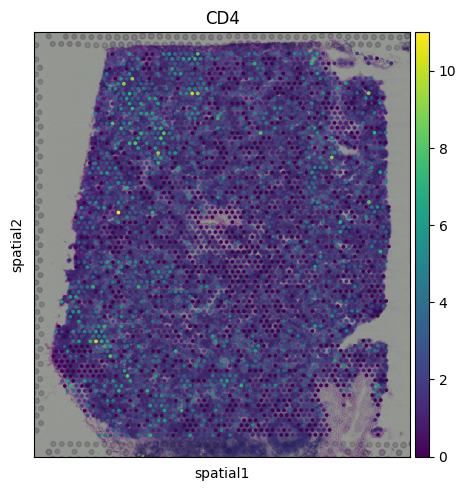

In [44]:
idx = 5
celltype = "Cardiomyocytes"
celltype_col = "celltype_mapped_refined"
gene_name = "CD4"
st_path = st_paths[idx]
sc_path = sc_paths[idx]
st_data = sc.read_h5ad(st_path)
sc_data = sc.read_h5ad(sc_path)
# sc_data.obs[celltype] = (sc_data.obs[celltype_col] == celltype).astype(int)

fig, axs = plt.subplots(1, 1, figsize=(5, 5), layout="tight")
sc.pl.spatial(st_data, color=gene_name, show=False, ax=axs)
# sc.pl.spatial(sc_data, color=celltype, show=False, ax=axs[1])
name = st_path.split("/")[-1].split(".")[0]
plt.savefig(f"./figures/datasets/{name}", dpi=200, bbox_inches="tight")

In [41]:
st_data

AnnData object with n_obs × n_vars = 4035 × 36588
    obs: 'in_tissue', 'array_row', 'array_col', 'sample'
    var: 'gene_ids', 'feature_types', 'genome', 'SYMBOL', 'MT_gene'
    uns: 'spatial'
    obsm: 'MT', 'spatial'

In [42]:
sc_data

AnnData object with n_obs × n_vars = 73260 × 10237
    obs: 'Age', 'BCELL_CLONE', 'BCELL_CLONE_SIZE', 'Donor', 'ID', 'IGH_MU_FREQ', 'ISOTYPE', 'LibraryID', 'Method', 'Population', 'PrelimCellType', 'Sample', 'Sex', 'Study', 'Tissue', 'barcode', 'batch', 'doublet_score', 'index', 'predicted_doublet', 'percent_mito', 'n_counts', 'n_genes', 'S_score', 'G2M_score', 'phase', 'VDJsum', 'cell_cycle_diff', 'PrelimCellType_new', 'leiden', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'CellType', 'CellType2', 'Subset', 'Subset_Broad', 'Subset_all', 'new_celltype', 'Subset_int', 'Subset_print'
    var: 'GeneID-2', 'GeneName-2', 'feature_types', 'feature_types-0', 'feature_types-1', 'gene_ids-1', 'gene_ids-4861STDY7135913-0', 'gene_ids-4861STDY7135914-0', 'gene_ids-4861STDY7208412-0', 'gene_ids-4861STDY7208413-0', 'gene_ids-Human_colon_16S7255677-0', 'gene_ids-Human_colon_16S7255678-0', 'gene_ids-Human_colon_16S8000484-0', 'gene_ids-Pan_T7935494-0', 'genome-1', 'n_cells', 'nonz_mean', 'mean_cov_

In [6]:
st_path = st_paths[0]
sc_path = sc_paths[0]
experiment_path = experiment_paths[0]

In [14]:
sc.read_h5ad(st_path)

AnnData object with n_obs × n_vars = 3244 × 18961
    obs: 'row', 'col', 'blood vessel smooth muscle cell', 'endothelial cell', 'kidney collecting duct intercalated cell', 'kidney collecting duct principal cell', 'kidney distal convoluted tubule epithelial cell', 'kidney granular cell', 'kidney interstitial fibroblast', 'kidney loop of Henle thick ascending limb epithelial cell', 'kidney proximal convoluted tubule epithelial cell', 'leukocyte', 'macrophage', 'mesangial cell', 'podocyte'
    uns: 'spatial'
    obsm: 'spatial'

## Number of neighbors per radius for each dataset

In [32]:
st_paths = [f"./data/{path}" for path in st_data_files]

In [69]:
st_data = sc.read_h5ad(st_paths[5])
coords = st_data.obsm["spatial"]

norm_coords, dist_mat, adj_mat = construct_spatial_graph(coords)

mean_first_dist = np.mean(np.sort(dist_mat, axis=1)[:, 1])
print(f"Mean distance to nearest neighbor: {mean_first_dist:.5f}")
np.sort(dist_mat, axis=1)[:, 0:6]


Mean distance to nearest neighbor: 0.01400


array([[0.        , 0.01107984, 0.01405181, 0.02302704, 0.02399286,
        0.0247968 ],
       [0.        , 0.01443848, 0.01552051, 0.01789018, 0.02194348,
        0.02302739],
       [0.        , 0.01362741, 0.01434658, 0.01651279, 0.01657359,
        0.01960467],
       ...,
       [0.        , 0.01629069, 0.01645334, 0.01698821, 0.01769874,
        0.02150595],
       [0.        , 0.01465089, 0.01486589, 0.01575899, 0.01698821,
        0.01951671],
       [0.        , 0.01408617, 0.01486589, 0.01509603, 0.01598271,
        0.01960467]], dtype=float32)

In [81]:
coords.max(axis=0) - coords.min(axis=0)

array([[8346, 6982],
       [4270, 1363],
       [2635, 8074],
       ...,
       [3181, 6396],
       [4153, 9747],
       [4822, 1840]])

In [82]:
print(coords.max(axis=0))
print(coords.min(axis=0))

[ 9571 10231]
[1396  992]


In [84]:
nn_dists = []
for st_path in st_paths:
    st_data = sc.read_h5ad(st_path)
    coords = st_data.obsm["spatial"]
    norm_coords = normalize_coords(coords)
    dist_mat = distance_matrix(norm_coords, norm_coords)
    mean_first_dist = np.mean(np.sort(dist_mat, axis=1)[:, 1])
    print(coords.max(axis=0))
    print(coords.min(axis=0))
    print(f"Mean distance to nearest neighbor: {mean_first_dist:.5f}")
    if mean_first_dist < 0.02:
        nn_dists.append(mean_first_dist)
    # np.sort(dist_mat, axis=1)[:, 0:6]

[5584.64285714 5421.13333333]
[826.09       706.78214286]
Mean distance to nearest neighbor: 0.01375
[5742.3   5550.875]
[789.8        684.12733333]
Mean distance to nearest neighbor: 0.01811
[1260.14685406 1532.41612975]
[-1274.68411824 -1529.56421375]
Mean distance to nearest neighbor: 0.01464
[ 941.10804443 1390.73616098]
[ -994.18784273 -1369.18229642]
Mean distance to nearest neighbor: 0.01662
[1508.16257704 1877.95729988]
[-1766.51323623 -2007.16510433]
Mean distance to nearest neighbor: 0.01117
[3942.42467586 3940.02114222]
[0. 0.]
Mean distance to nearest neighbor: 0.03595
[3937.57196629 3946.27345125]
[0. 0.]
Mean distance to nearest neighbor: 0.03609


/root/miniconda3/envs/dissect-spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


[ 9533 10468]
[1480 2684]
Mean distance to nearest neighbor: 0.01705


/root/miniconda3/envs/dissect-spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


[ 9571 10231]
[1396  992]
Mean distance to nearest neighbor: 0.01487


In [80]:
np.mean(nn_dists)

0.015172410383497552

In [47]:
st_data.uns["spatial"]["V1_Human_Lymph_Node"]["scalefactors"]

{'fiducial_diameter_fullres': 144.56071500517945,
 'spot_diameter_fullres': 89.48996643177776,
 'tissue_hires_scalef': 0.17011142,
 'tissue_lowres_scalef': 0.051033426}

In [36]:
sc.read_h5ad(st_paths[-1]).obsm["spatial"]

/root/miniconda3/envs/dissect-spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


array([[8346, 6982],
       [4270, 1363],
       [2635, 8074],
       ...,
       [3181, 6396],
       [4153, 9747],
       [4822, 1840]])

In [33]:
radii = [0.0001, 0.01, 0.02, 0.03, 0.04, 0.05]

In [70]:
avg_degrees = []
radius_list = []
st_path_list = []
for st_path in st_paths[0::]:
    st_data = load_spatial_data(st_path=st_path)
    print(f"Loaded {st_path}")
    for radius in radii:
        # get average num neighbors for radius
        avg_degree, graph = check_graph_construction(
            st_data.obsm["spatial"], radius=radius, num_hops=1, draw=False, verbose=False
        )
        print(f"Radius: {radius}, Avg degree: {avg_degree}")
        avg_degrees.append(avg_degree)
        radius_list.append(radius)
        st_path_list.append(st_path.split("/")[-1])

Loaded ./data/spatial/simulations_kidney_slideSeq_v2/UMOD-WT.WT-2a_resolution75.h5ad
Radius: 0.0001, Avg degree: 2.0
Radius: 0.01, Avg degree: 2.0191122071516645
Radius: 0.02, Avg degree: 6.112207151664611
Radius: 0.03, Avg degree: 10.377928483353884
Radius: 0.04, Avg degree: 21.188039457459926
Radius: 0.05, Avg degree: 30.82367447595561
Loaded ./data/spatial/simulations_kidney_slideSeq_v2/UMOD-KI.KI-4b_resolution105.h5ad
Radius: 0.0001, Avg degree: 2.0
Radius: 0.01, Avg degree: 2.024403771491958
Radius: 0.02, Avg degree: 5.983361064891847
Radius: 0.03, Avg degree: 10.211869107043816
Radius: 0.04, Avg degree: 20.677759290072103
Radius: 0.05, Avg degree: 28.521353300055463
Loaded ./data/spatial/simulations_heart_seqFISH/embryo1_resolution0.11.h5ad
Radius: 0.0001, Avg degree: 2.0
Radius: 0.01, Avg degree: 2.0682926829268293
Radius: 0.02, Avg degree: 5.478048780487805
Radius: 0.03, Avg degree: 9.047560975609755
Radius: 0.04, Avg degree: 16.690243902439025
Radius: 0.05, Avg degree: 21.9317

/root/miniconda3/envs/dissect-spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Loaded ./data/spatial/V1_Mouse_Brain_Sagittal_Anterior.h5ad
Radius: 0.0001, Avg degree: 2.0
Radius: 0.01, Avg degree: 2.0
Radius: 0.02, Avg degree: 7.809276437847866
Radius: 0.03, Avg degree: 19.143599257884972
Radius: 0.04, Avg degree: 30.233766233766232
Radius: 0.05, Avg degree: 41.12949907235622


/root/miniconda3/envs/dissect-spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Loaded ./data/spatial/lymph_node/st_lymph.h5ad
Radius: 0.0001, Avg degree: 2.0
Radius: 0.01, Avg degree: 2.0
Radius: 0.02, Avg degree: 7.823543990086741
Radius: 0.03, Avg degree: 19.22280049566295
Radius: 0.04, Avg degree: 30.413382899628253
Radius: 0.05, Avg degree: 41.46765799256506


/tmp/ipykernel_1396068/1760312376.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use("seaborn-paper")


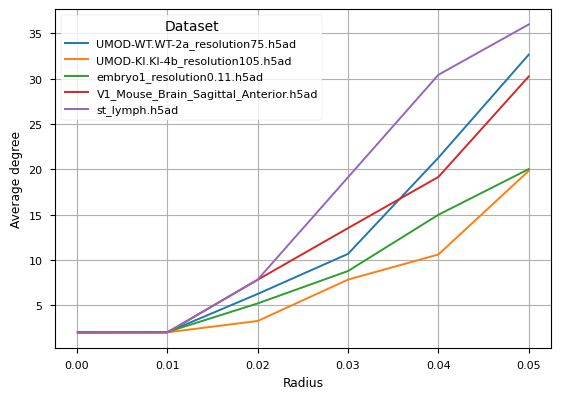

In [11]:
# combine everything into a dataframe
df = pd.DataFrame(
    {
        "radius": radius_list,
        "avg_degree": avg_degrees,
        "st_path": st_path_list,
    }
)
# plot with seaborn lineplot
# set style paper
mpl.style.use("seaborn-paper")
sns.lineplot(data=df, x="radius", y="avg_degree", hue="st_path")
# change legend title
plt.legend(title="Dataset")
plt.xlabel("Radius")
plt.ylabel("Average degree")
plt.grid(True)

plt.savefig("../figures/avg_degree_vs_radius.png", dpi=200, bbox_inches="tight")
plt.show()

In [8]:
st_data = load_spatial_data(st_path=st_path)
X_real, X_real_train, X_sim, y_sim = load_prepared_data(experiment_path)

# sc_data = sc.read_h5ad(sc_path)
y_real = st_data.obs[st_data.obs.columns[2::]].to_numpy()
y_real = st_data.obs[st_data.obs.columns[2::]]
sc_data = sc.read_h5ad(f"{sc_path}")

## Relationship between latent dist and cell proportions

In [24]:
# perform pca on st_data and on simulated data
for st_path, sc_path, experiment_path in zip(st_paths, sc_paths, experiment_paths):
    st_data = load_spatial_data(st_path=st_path)
    st_data.var_names_make_unique()
    X_real, X_real_train, X_sim, y_sim = load_prepared_data(experiment_path)
    # sc_data = sc.read_h5ad(sc_path)
    y_real = st_data.obs[st_data.obs.columns[2::]].to_numpy()
    y_real_df = st_data.obs[st_data.obs.columns[2::]]


/root/miniconda3/envs/dissect-spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/root/miniconda3/envs/dissect-spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


## Further analysis

In [9]:
sc_data.obs

,assay_ontology_term_id,self_reported_ethnicity_ontology_term_id,is_primary_data,organism_ontology_term_id,sample,tissue_ontology_term_id,disease_state,sex_ontology_term_id,genotype,development_stage_ontology_term_id,...,suspension_type,cell_type,assay,disease,organism,sex,tissue,self_reported_ethnicity,development_stage,Sample
AAAAAACCAGTAAG,EFO:0030062,na,True,NCBITaxon:10090,UMOD-WT/WT-2a,UBERON:0002113,control,PATO:0000384,UMOD-WT/WT,MmusDv:0000077,...,na,kidney proximal convoluted tubule epithelial cell,Slide-seqV2,normal,Mus musculus,male,kidney,na,6 month-old stage,UMOD-WT.WT-2a
AAAAAACCTCTAAA,EFO:0030062,na,True,NCBITaxon:10090,UMOD-WT/WT-2a,UBERON:0002113,control,PATO:0000384,UMOD-WT/WT,MmusDv:0000077,...,na,kidney proximal convoluted tubule epithelial cell,Slide-seqV2,normal,Mus musculus,male,kidney,na,6 month-old stage,UMOD-WT.WT-2a
AAAAATAGTAAAAT,EFO:0030062,na,True,NCBITaxon:10090,UMOD-WT/WT-2a,UBERON:0002113,control,PATO:0000384,UMOD-WT/WT,MmusDv:0000077,...,na,kidney proximal convoluted tubule epithelial cell,Slide-seqV2,normal,Mus musculus,male,kidney,na,6 month-old stage,UMOD-WT.WT-2a
AAAAATAGTTGACC,EFO:0030062,na,True,NCBITaxon:10090,UMOD-WT/WT-2a,UBERON:0002113,control,PATO:0000384,UMOD-WT/WT,MmusDv:0000077,...,na,kidney proximal convoluted tubule epithelial cell,Slide-seqV2,normal,Mus musculus,male,kidney,na,6 month-old stage,UMOD-WT.WT-2a
AAAAATTCGTTTCT,EFO:0030062,na,True,NCBITaxon:10090,UMOD-WT/WT-2a,UBERON:0002113,control,PATO:0000384,UMOD-WT/WT,MmusDv:0000077,...,na,kidney proximal convoluted tubule epithelial cell,Slide-seqV2,normal,Mus musculus,male,kidney,na,6 month-old stage,UMOD-WT.WT-2a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTTTACGCGTTTA,EFO:0030062,na,True,NCBITaxon:10090,UMOD-WT/WT-2a,UBERON:0002113,control,PATO:0000384,UMOD-WT/WT,MmusDv:0000077,...,na,leukocyte,Slide-seqV2,normal,Mus musculus,male,kidney,na,6 month-old stage,UMOD-WT.WT-2a
TTTTTTCACAGTTC,EFO:0030062,na,True,NCBITaxon:10090,UMOD-WT/WT-2a,UBERON:0002113,control,PATO:0000384,UMOD-WT/WT,MmusDv:0000077,...,na,leukocyte,Slide-seqV2,normal,Mus musculus,male,kidney,na,6 month-old stage,UMOD-WT.WT-2a
TTTTTTCTTAGGTT,EFO:0030062,na,True,NCBITaxon:10090,UMOD-WT/WT-2a,UBERON:0002113,control,PATO:0000384,UMOD-WT/WT,MmusDv:0000077,...,na,leukocyte,Slide-seqV2,normal,Mus musculus,male,kidney,na,6 month-old stage,UMOD-WT.WT-2a
TTTTTTGCTTACGT,EFO:0030062,na,True,NCBITaxon:10090,UMOD-WT/WT-2a,UBERON:0002113,control,PATO:0000384,UMOD-WT/WT,MmusDv:0000077,...,na,leukocyte,Slide-seqV2,normal,Mus musculus,male,kidney,na,6 month-old stage,UMOD-WT.WT-2a


In [9]:
celltype = "endothelial cell"
celltype = "kidney proximal convoluted tubule epithelial cell"

In [10]:
# get max celltypes for spatial dat
st_data.obs["celltype"] = y_real.idxmax(axis=1)

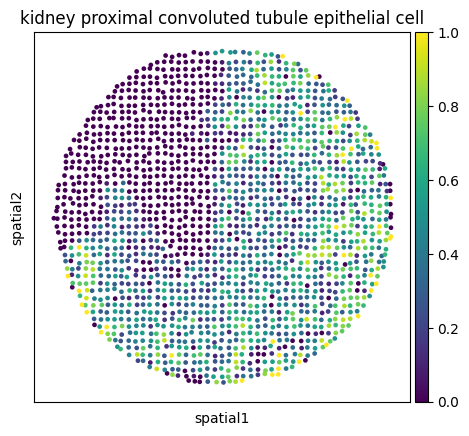

In [11]:
sc.pl.spatial(st_data, color=celltype, show=False)
plt.savefig(f"{base_path}/figures/grid_slideseq.png", dpi=300, bbox_inches="tight")

KeyError: 'Could not find key kidney proximal convoluted tubule epithelial cell in .var_names or .obs.columns.'

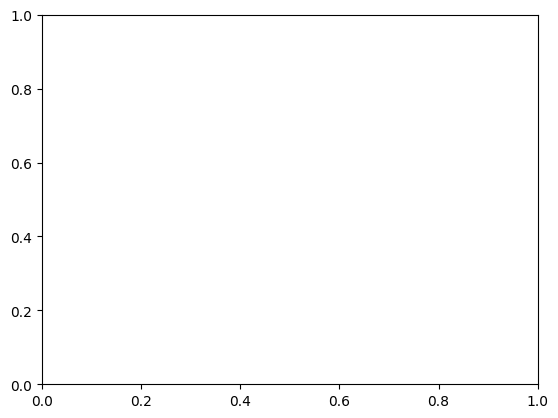

In [12]:
sc.pl.spatial(sc_data, color=celltype, show=False)
plt.savefig(f"{base_path}/figures/original_slideseq.png", dpi=300, bbox_inches="tight")

## Analyze relationship between gene expression similarity and spatial distance

### Fist use celltype composition as proxy for gene expression similarity

In [7]:
st_data

AnnData object with n_obs × n_vars = 1803 × 18961
    obs: 'row', 'col', 'blood vessel smooth muscle cell', 'endothelial cell', 'kidney collecting duct intercalated cell', 'kidney collecting duct principal cell', 'kidney distal convoluted tubule epithelial cell', 'kidney interstitial fibroblast', 'kidney loop of Henle thick ascending limb epithelial cell', 'kidney proximal convoluted tubule epithelial cell', 'leukocyte', 'macrophage', 'mesangial cell', 'podocyte'
    uns: 'spatial'
    obsm: 'spatial'

In [68]:
coords = normalize_coords(st_data.obsm["spatial"])

In [20]:
celltype_abundances = st_data.obs[st_data.obs.columns[2::]].to_numpy()

In [69]:
dist_mat = scipy.spatial.distance_matrix(coords, coords)

In [28]:
celltype_distances = scipy.spatial.distance_matrix(
    celltype_abundances, celltype_abundances
)

In [35]:
celltype_distances = []
for vec_1 in tqdm(celltype_abundances):
    for vec_2 in celltype_abundances:
        dist = scipy.spatial.distance.jensenshannon(vec_1, vec_2)
        celltype_distances.append(dist)

In [39]:
# analyze correlation between celltype distance and euclidean distance
result = scipy.stats.pearsonr(dist_mat.flatten(), celltype_distances.flatten())

### Consider the full expression profile

In [70]:
sc.pp.filter_genes(st_data, min_cells=10)

/root/miniconda3/envs/dissect_spatial/lib/python3.8/site-packages/anndata/_core/anndata.py:1830: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


In [71]:
st_data

AnnData object with n_obs × n_vars = 2695 × 17103
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'
    uns: 'spatial'
    obsm: 'spatial'

In [72]:
sc.pp.normalize_total(st_data, target_sum=1e4)
sc.pp.log1p(st_data)

In [73]:
# maybe scale the data
# sc.pp.scale(st_data, max_value=10)
sc.tl.pca(st_data, n_comps=50)

In [74]:
pca_embeddings = st_data.obsm["X_pca"]
gene_expr_distances = scipy.spatial.distance_matrix(pca_embeddings, pca_embeddings)

In [75]:
# analyze correlation between celltype distance and euclidean distance
corr, pval = scipy.stats.pearsonr(dist_mat.flatten(), gene_expr_distances.flatten())

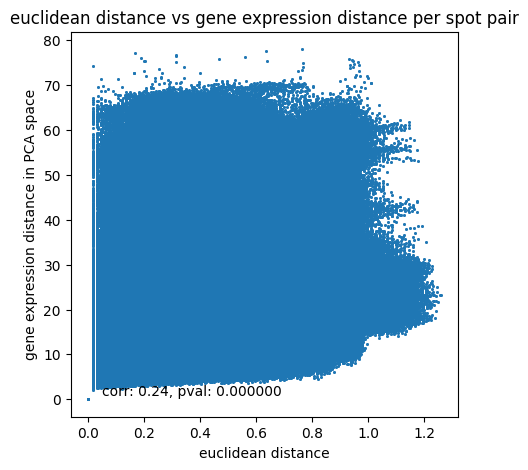

In [76]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(dist_mat.flatten(), gene_expr_distances.flatten(), s=1)
ax.set_xlabel("euclidean distance")
ax.set_ylabel("gene expression distance in PCA space")
plt.title("euclidean distance vs gene expression distance per spot pair")
# show corr and pval as text
ax.text(
    0.05,
    0.95,
    f"corr: {corr:.2f}, pval: {pval:.6f}",
)

plt.savefig(
    f"{base_path}/figures/euclidean_vs_gene_expr_distance_{experiment_name}.png",
    dpi=300,
    bbox_inches="tight",
)
plt.show()